In [1]:
import pandas as pd
# 형태소분석 라이브러리
from konlpy.tag import Okt
# 자연어 처리 라이브러리
import nltk
import os

In [2]:
# 형태소 분석기 객체 생성
okt = Okt()

In [3]:
targetPath = ''
filename = 'duple_reivews.csv'

In [4]:
fullPath = targetPath + filename
df = pd.read_csv(fullPath, header=None, names=['text'])
df['text'] = df['text'].astype(str)

In [6]:
nouns_train_data = []
morphs_train_data = []

In [5]:
stopwords = [
    # --- 조사 (Josa) 및 어미 (Eomi) ---
    '이', '가', '은', '는', '을', '를', '의', '에', '에서', '에게', '께', '로', '으로', 
    '와', '과', '보다', '처럼', '만큼', '같이', '까지', '마저', '조차', '부터', 
    '이나', '나', '이며', '며', '등', '하다', '한다', '하고', '하니', '하면', 
    '되어', '되다', '되고', '되니', '입니다', '습니다', 'ㅂ니다', '어요', '아요', '다', 
    '고', '면', '며', '게', '지', '죠',

    # --- 접속 부사 (Conjunctive Adverbs) ---
    '그리고', '그러나', '하지만', '그런데', '그래서', '그러면', '그러므로', '따라서', 
    '또한', '또는', '및', '즉', '한편', '반면에', '근데'

    # --- 대명사 (Pronouns) ---
    '나', '저', '우리', '저희', '너', '너희', '당신', '그', '그녀', '그들', '누구', 
    '무엇', '어디', '언제', '어느', '이것', '그것', '저것', '여기', '거기', '저기', 
    '이쪽', '그쪽', '저쪽',

    # --- 수사 (Numerals) ---
    '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열',
    '일', '이', '삼', '사', '오', '육', '칠', '팔', '구', '십', '백', '천', '만',
    '첫째', '둘째', '셋째',

    # --- 일반 부사 및 명사 (General Adverbs and Nouns) ---
    '바로', '때', '것', '수', '일', '문제', '경우', '부분', 
    '내용', '결과', '자체', '가지',

    # --- 의존 명사 (Dependent Nouns) ---
    '뿐', '대로', '만큼', '만', '지', '따름', '나름', '김에', '터',

    # --- 감탄사 및 기타 (Interjections and Others) ---
    '아', '아이고', '아이구', '아하', '어', '그래', '응', '네', '예', '아니',
]

In [ ]:
for text in df['text'] :
    nouns_tokens = okt.nouns(text)
    morphs_tokens = okt.morphs(text)
    nouns_filtered = [w for w in nouns_tokens if w not in stopwords]
    morphs_filtered = [w for w in morphs_tokens if w not in stopwords]
    nouns_train_data.append(nouns_filtered)
    morphs_train_data.append(morphs_filtered)

In [ ]:
nouns_train_data
morphs_train_data

In [ ]:
nouns_all_tokens = [word for tokens in nouns_train_data for word in tokens]
morphs_all_tokens = [word for tokens in morphs_train_data for word in tokens]

n_vocabulary = list(set(nouns_all_tokens))
m_vocabulary = list(set(morphs_all_tokens))
print("명사의 모든 토큰 개수:", len(nouns_all_tokens))
print("품사의 모든 토큰 개수:", len(morphs_all_tokens))
print("명사 사전의 단어 개수:", len(n_vocabulary))
print("단어 사전의 단어 개수:", len(m_vocabulary))

In [ ]:
n_vocabulary

In [11]:
n_df = pd.DataFrame(n_vocabulary)
m_df = pd.DataFrame(m_vocabulary)
filename = '명사추출.csv'
n_df.to_csv(filename, encoding='utf-8-sig', index=False, header=False)
m_df.to_csv('품사추출.csv', encoding='utf-8-sig', index=False, header=False)

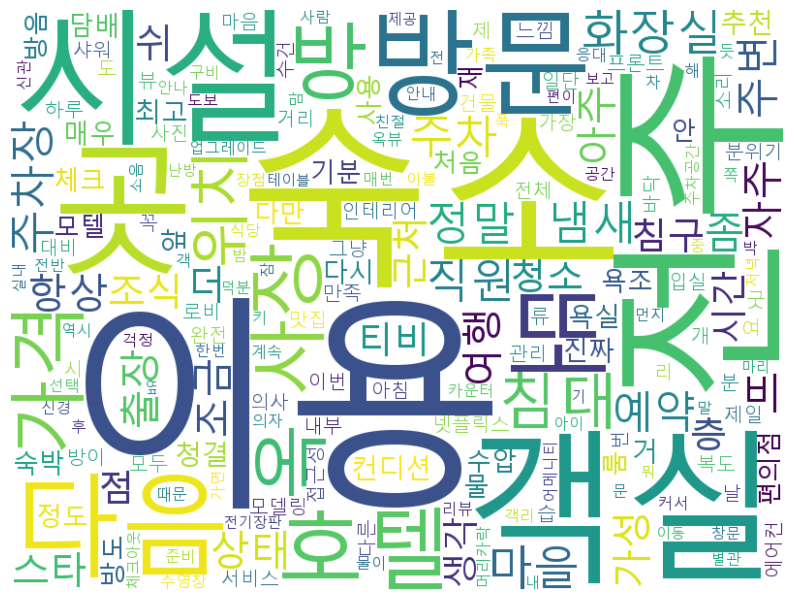

In [12]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_count = Counter(nouns_all_tokens)
wc = WordCloud(font_path='malgun.ttf', background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(10, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# def create_feature_set(tokens, vocabulary) :
#     token_set = set(tokens)
#     features = { word : (word in token_set) for word in vocabulary }
#     return features

In [ ]:
# print("모델 학습 시작")
# model = nltk.NaiveBayesClassifier.train(train_feature_datas)
# print("모델 학습 완료")